In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from ssl import ALERT_DESCRIPTION_HANDSHAKE_FAILURE


class Model:

    def __init__(self,bet,kap,rstar,N,gam,phi,gy,sig,dc,dn,tol,nrho,ng):

        self.bet = bet
        self.kap = kap
        self.rstar = rstar
        self.N = N
        self.gam = gam
        self.phi = phi
        self.gy = gy
        self.sig = sig
        self.dc = dc
        self.dn = dn
        self.tol = tol
        self.nrho = nrho # p_{L}のグリッドの数(プロット用)
        self.ng = ng
        

In [8]:
def cer_nl_v1(gL,m,rho,zlbflag):
    """
    ---------------------------------------
    === 時間反復法によってモデルを解く関数 ===
    ---------------------------------------
    <input>
    ・gL: 状態Lでの政府支出
    ・m: パラメータを含むコンストラクタ
    ・rho: 状態Lの慣性(※異なるrhoについて財政乗数を計算したいからコンストラクタの外で定義している)
    ・zlbflag: ゼロ金利制約があるケース(=1) / ゼロ金利制約がないケース(=0)
    <output>
    ・yL: 状態Lでの産出量
    """
    print(f"gL = {gL:.4f}\n")

    # STEP 1(a): グリッド生成
    pH = 0.0
    pL = rho
    sH = m.rstar
    sL = -1.5; # 状態Lの時は、ZLBに直面するという仮定を置いているので財政乗数には影響を与えない。
    Gg = np.array([[0.0],[gL]])
    Pg = np.array([[1-pH,pH],[1-pL,pL]])
    Gs = np.array([[sH],[sL]])

    # STEP 1(b): 政策関数の初期値を当て推量
    # 適当な初期値
    lamvec0 = np.zeros(m.ng)
    pivec0 = np.zeros(m.ng)
    lamvec1 = np.empty_like(lamvec0)
    pivec1 = np.empty_like(pivec0)
    cvec = np.empty_like(lamvec0)
    nvec = np.empty_like(lamvec0)
    rvec = np.empty_like(lamvec0)

    # STEP 4: 政策関数を繰り返し計算
    diff = 1e+4 # 政策関数の繰り返し誤差
    iter = 0 # ループ・カウンター

    while diff > m.tol:

        for ig in range(m.ng):

            # ショックの値
            g0 = Gg[ig]

            # 古い政策関数から期待値(lame,pie)を計算
            lame = Pg[ig,:].T @ lamvec0
            pie = Pg[ig,:].T @ pivec0

            if zlbflag == 1: # ゼロ金利制約がある場合
                r0 = np.maximum(m.rstar+m.phi*pie,0.0)
            else: # ゼロ金利制約がない場合
                r0 = m.rstar+m.phi*pie

            lam0 = lame + r0 - pie - Gs[ig]
            c0 = (lam0 - m.dn*m.gy*g0)/(m.dc + m.dn*(1-m.gy))
            n0 = (1-m.gy)*c0 + m.gy*g0;
            pi0 = m.bet*pie + m.kap*(c0 + m.N/(1-m.N)*n0)

            lamvec1[ig] = lam0
            pivec1[ig] = pi0
            cvec[ig] = c0
            nvec[ig] = n0
            rvec[ig] = r0
        
        diff_lam = np.max(abs(lamvec1-lamvec0))
        diff_pi  = np.max(abs(pivec1-pivec0))
        diff = max(diff_lam,diff_pi)    
        iter = iter + 1

        # n000回目のイタレーションで結果を出力する
        #if (np.mod(iter,1000) == 0):
        #    print([iter, diff_lam, diff_pi])

        lamvec0 = np.copy(lamvec1)
        pivec0 = np.copy(pivec1)

    if rvec[1]>0:
        print("ZLB is not binding at state L!!!")

    yL = nvec[1]

    return yL

In [9]:
# カリブレーション
bet = 0.99
kap = 0.03
rstar = 100/bet-100
N = 1/3
gam = 0.29
phi = 1.5
gy = 0.2
sig = 2.0
dc = gam*(1-sig)-1
dn = -(1-gam)*(1-sig)*N/(1-N)
tol = 1e-10
nrho = 12
ng = 2

# 構造体にパラメータを格納 
m = Model(bet,kap,rstar,N,gam,phi,gy,sig,dc,dn,tol,nrho,ng)

# プロット用に異なるrhoのベクトルと結果を格納する配列を用意する
rhovec = np.linspace(0.7,0.81,m.nrho)
mpvec0 = np.zeros(m.nrho) # ゼロ金利制約がないケースでの結果を格納
mpvec1 = np.zeros(m.nrho) # ゼロ金利制約があるケースでの結果を格納

for i in range(m.nrho):
    
    rho = rhovec[i]

    # ゼロ金利制約がないケース
    yL1 = cer_nl_v1(1.0,m,rho,0)
    yL0 = cer_nl_v1(0.0,m,rho,0)
    mpvec0[i] = (yL1-yL0)/m.gy

    # ゼロ金利制約があるケース
    yL1 = cer_nl_v1(1.0,m,rho,1)
    yL0 = cer_nl_v1(0.0,m,rho,1)
    mpvec1[i] = (yL1-yL0)/m.gy

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000

gL = 1.0000

gL = 0.0000



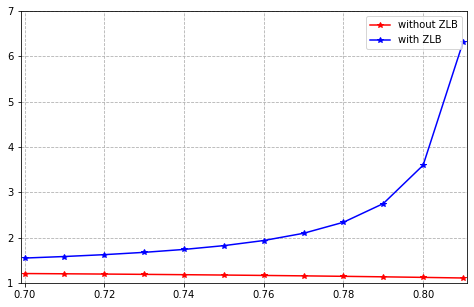

In [10]:
# プロット
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(rhovec,mpvec0,c="r",marker="*", label="without ZLB")
ax.plot(rhovec,mpvec1,c="b",marker="*", label="with ZLB")
ax.set(xlim=(rhovec[0]-0.001,rhovec[m.nrho-1]+0.001),ylim=(1,7))
ax.legend(loc="upper right")
ax.grid(ls="--")
plt.show()